# Project Name - Pizza Sales

# what we have to find 
# 1-total sales
# 2-identify which pizza is ordered the most
# 3- Identify which pizza is generating more sales
# 4 -Identify which pizza category is hotselling.
# 5 - identify which day of the week we are getting the most orders.
# 6 - identify the time at which we are getting high orders and the time at which we are getting the lowest orders.
# (7) Identify at which time of the day, people are ordering more pizzas(morning/evening/afternoon/night)¶

In [30]:
import pandas as pd
pizzas=pd.read_csv("pizzas.csv")
pizzas.head(1)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75


In [31]:
import pandas as pd
pizza_details=pd.read_csv("pizza_details.csv")
pizza_details.head(1)


,pizza_type_id,name,category
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken


In [32]:
import pandas as pd
orders=pd.read_csv("orders.csv")
orders.head(1)


,order_id,date,time
0,1,2015-01-01,11:38:36


In [33]:
import pandas as pd
order_details=pd.read_csv("order_details.csv")
order_details.head(1)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1


# (1)- Total Sales


In [34]:
total_sales=pd.merge(pizzas,order_details,on='pizza_id',how='inner')
total_sales.head(1)

,pizza_id,pizza_type_id,size,price,order_details_id,order_id,quantity
0,bbq_ckn_s,bbq_ckn,S,12.75,11,6,1


In [17]:
total_sales.head(2)

,pizza_id,pizza_type_id,size,price,order_details_id,order_id,quantity
0,bbq_ckn_s,bbq_ckn,S,12.75,11,6,1
1,bbq_ckn_s,bbq_ckn,S,12.75,239,102,1


In [35]:
total_sales["sales"]=total_sales["price"] * total_sales["quantity"]
total_sales.head(1)

,pizza_id,pizza_type_id,size,price,order_details_id,order_id,quantity,sales
0,bbq_ckn_s,bbq_ckn,S,12.75,11,6,1,12.75


In [36]:
total_sales["sales"].sum()

817860.05

# (2) identify which pizza is ordered the most

In [37]:
most_ordered_pizza=pd.merge(total_sales,pizza_details,on="pizza_type_id",how='inner')
most_ordered_pizza.head(1)

,pizza_id,pizza_type_id,size,price,order_details_id,order_id,quantity,sales,name,category
0,bbq_ckn_s,bbq_ckn,S,12.75,11,6,1,12.75,The Barbecue Chicken Pizza,Chicken


In [38]:
most_ordered=most_ordered_pizza.groupby(["name"]).agg({"order_details_id":'count'})
#most_ordered["order_details_id"].idxmax()
print("most order pizza is :",most_ordered["order_details_id"].idxmax())

most order pizza is : The Classic Deluxe Pizza


# (3)- Identify which pizza is generating more sales

In [39]:
more_sales=most_ordered_pizza.groupby(["name"]).agg({"sales":"sum"})
print(more_sales["sales"].idxmax(),": This pizza is  generating more sales")
more_sales

The Thai Chicken Pizza : This pizza is  generating more sales


,sales
name,
The Barbecue Chicken Pizza,42768.00
The Big Meat Pizza,22968.00
The Brie Carre Pizza,11588.50
The Calabrese Pizza,15934.25
The California Chicken Pizza,41409.50
The Chicken Alfredo Pizza,16900.25
The Chicken Pesto Pizza,16701.75
The Classic Deluxe Pizza,38180.50
The Five Cheese Pizza,26066.50


# (4)- Identify which pizza category is hotselling.

In [40]:
pizza_hotselling=most_ordered_pizza.groupby(['category']).agg({"order_details_id":'count'})
print("which pizza category is hotselling :",pizza_hotselling["order_details_id"].idxmax())
pizza_hotselling

which pizza category is hotselling : Classic


,order_details_id
category,
Chicken,10815
Classic,14579
Supreme,11777
Veggie,11449


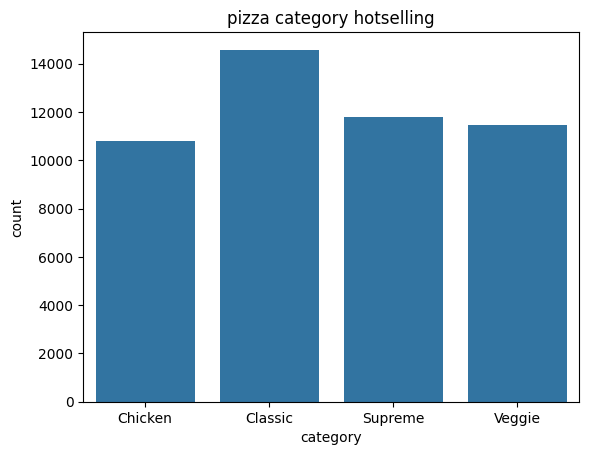

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

hot=sns.countplot(x='category',data=most_ordered_pizza)
plt.title("pizza category hotselling")
plt.show()

# (5) identify which day of the week we are getting the most orders.


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [42]:
orders['date']=pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 500.5+ KB


In [43]:
orders['weekday']=orders['date'].dt.strftime("%A")
orders.head(1)

,order_id,date,time,weekday
0,1,2015-01-01,11:38:36,Thursday


In [44]:
most_ordered_day=orders.groupby(["weekday"]).agg({'order_id':'count'})
print("which day of the week we are getting the most orders :",most_ordered_day['order_id'].idxmax())

most_ordered_day

which day of the week we are getting the most orders : Friday


,order_id
weekday,
Friday,3538
Monday,2794
Saturday,3158
Sunday,2624
Thursday,3239
Tuesday,2973
Wednesday,3024


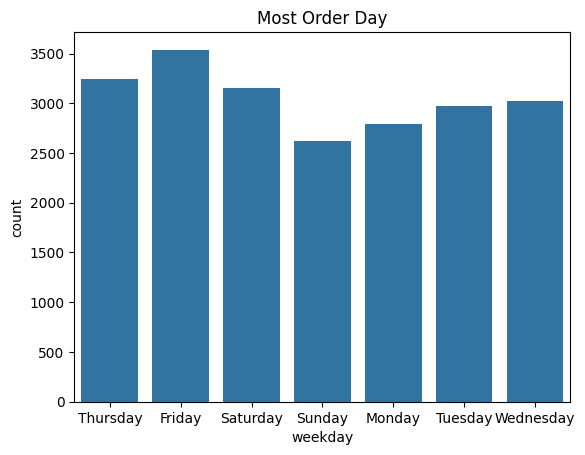

In [28]:
import matplotlib .pyplot as plt
import seaborn as sns
sns.countplot(x="weekday",data=orders)
plt.title("Most Order Day")
plt.show()


# (6) - identify the time at which we are getting high orders and the time at which we are getting the lowest orders.¶

In [47]:
orders['time']=pd.to_datetime(orders['time'])
orders.info()

C:\Users\hp\AppData\Local\Temp\ipykernel_14188\1393817163.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders['time']=pd.to_datetime(orders['time'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
 3   weekday   21350 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 667.3+ KB


In [49]:
orders["hour"]=orders["time"].dt.strftime("%H")
orders

,order_id,date,time,weekday,hour
0,1,2015-01-01,2023-11-30 11:38:36,Thursday,11
1,2,2015-01-01,2023-11-30 11:57:40,Thursday,11
2,3,2015-01-01,2023-11-30 12:12:28,Thursday,12
3,4,2015-01-01,2023-11-30 12:16:31,Thursday,12
4,5,2015-01-01,2023-11-30 12:21:30,Thursday,12
...,...,...,...,...,...
21345,21346,2015-12-31,2023-11-30 20:51:07,Thursday,20
21346,21347,2015-12-31,2023-11-30 21:14:37,Thursday,21
21347,21348,2015-12-31,2023-11-30 21:23:10,Thursday,21
21348,21349,2015-12-31,2023-11-30 22:09:54,Thursday,22


In [78]:
Time_order=pd.merge(orders,order_details,on='order_id',how='inner')
Time_order

,order_id,date,time,weekday,hour,order_details_id,pizza_id,quantity
0,1,2015-01-01,2023-11-30 11:38:36,Thursday,11,1,hawaiian_m,1
1,2,2015-01-01,2023-11-30 11:57:40,Thursday,11,2,classic_dlx_m,1
2,2,2015-01-01,2023-11-30 11:57:40,Thursday,11,3,five_cheese_l,1
3,2,2015-01-01,2023-11-30 11:57:40,Thursday,11,4,ital_supr_l,1
4,2,2015-01-01,2023-11-30 11:57:40,Thursday,11,5,mexicana_m,1
...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,2023-11-30 21:23:10,Thursday,21,48616,ckn_alfredo_m,1
48616,21348,2015-12-31,2023-11-30 21:23:10,Thursday,21,48617,four_cheese_l,1
48617,21348,2015-12-31,2023-11-30 21:23:10,Thursday,21,48618,napolitana_s,1
48618,21349,2015-12-31,2023-11-30 22:09:54,Thursday,22,48619,mexicana_l,1


In [79]:
high_time=Time_order.groupby(['hour']).agg({'order_details_id':'count'})
print("which time we are getting high orders :",high_time['order_details_id'].idxmax())
print("which time we are getting low orders :",high_time['order_details_id'].idxmin())
     


which time we are getting high orders : 12
which time we are getting low orders : 9


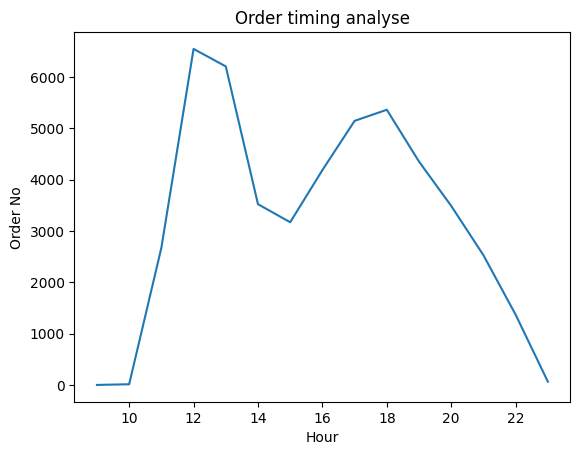

In [101]:
gb=Time_order.groupby(['hour']).agg({'order_details_id':'count'})

plt.plot(gb.index,gb['order_details_id'])
plt.title("Order timing analyse")
plt.xlabel("Hour")
plt.ylabel("Order No")
plt.show()


# (7) Identify at which time of the day, people are ordering more pizzas(morning/evening/afternoon/night)


In [112]:
Time_order.loc[((Time_order['hour']>=1) & (Time_order['hour']<=12)),"day_time"]="morning"
Time_order.loc[((Time_order['hour']>12)& (Time_order['hour']<=17)),"day_time"]="afternoon"
Time_order.loc[((Time_order['hour']>17)& (Time_order['hour']<=24)),"day_time"]="evening"
Time_order.head(1)


,order_id,date,time,weekday,hour,order_details_id,pizza_id,quantity,day_time
0,1,2015-01-01,2023-11-30 11:38:36,Thursday,11,1,hawaiian_m,1,morning


In [113]:
day_T=Time_order.groupby(["day_time"]).agg({"order_details_id":"count"})
day_T

,order_details_id
day_time,
afternoon,22222
evening,17162
morning,9236


In [1]:
plt.plot(day_T.index,day_T["order_details_id"])
plt.title("Day Time")
plt.order(['morning','afternoon','evening'])

plt.show()

NameError: name 'plt' is not defined